In [1]:
import os
import pickle

import numpy as np
from matplotlib import pyplot as plt

In [2]:
def parse_pickle(pkl):
    """
    [train_loss, train_accuracy,chosen_clients,
                        weights,None if not args.gpr else gpr.state_dict(),
                        gt_global_losses,test_accuracy]
    """
    train_accuracy = pkl[1]
    gt_global_losses = pkl[-2]
    test_accuracy = pkl[-1]

    return train_accuracy, gt_global_losses, test_accuracy

In [4]:
save_root = './save/objects'
exp_dir = 'cifar100_FedAvg_cnn_5000_C[0.05]_iid[0]_sp[20]_E[3]_B[50]_mu[0.0]_lr[0.05000]'
rounds = 5000
dir_path = os.path.join(save_root, exp_dir)

print(os.listdir(save_root))
print(os.listdir(dir_path))

['cifar_FedAvg_cnn_2000_C[0.05]_iid[0]_alpha[0.2]_E[5]_B[50]_mu[0.0]_lr[0.01000]', 'cifar100_FedAvg_cnn_5000_C[0.05]_iid[0]_sp[20]_E[3]_B[50]_mu[0.0]_lr[0.05000]', 'fmnist_FedAvg_mlp_500_C[0.05]_iid[0]_alpha[0.2]_E[3]_B[64]_mu[0.0]_lr[0.00500]', 'cifar100_FedAvg_cnn_2000_C[0.05]_iid[0]_sp[20]_E[3]_B[50]_mu[0.0]_lr[0.11000]', 'cifar100_FedAvg_cnn_2000_C[0.05]_iid[0]_sp[2]_E[5]_B[50]_mu[0.0]_lr[0.01000]']
['gpr[int10_gp51_norm0]_time[0.95]_2.pkl', 'afl_3.pkl', 'gpr[int10_gp51_norm0]_time[0.95]_5.pkl', 'afl_1.pkl', 'powerd_d[10]_2.pkl', 'powerd_d[10]_4.pkl', 'random_4.pkl', 'gpr[int10_gp51_norm0]_time[0.95]_4.pkl', 'powerd_d[10]_5.pkl', 'random_3.pkl', 'powerd_d[10]_3.pkl', 'gpr[int10_gp51_norm0]_time[0.95]_1.pkl', 'random_1.pkl', 'gpr[int10_gp51_norm0]_time[0.95]_3.pkl', 'powerd_d[10]_1.pkl', 'afl_2.pkl', 'afl_4.pkl', 'random_5.pkl', 'afl_5.pkl', 'random_2.pkl']


In [5]:

pkl_list = ['random', 'afl', 'gpr[int10_gp51_norm0]_time[0.95]', 'powerd_d[10]']
pkl_tail = ['_1.pkl', '_2.pkl', '_3.pkl', '_4.pkl', '_5.pkl']

train_list = []
loss_list = []
test_list = []

for algo in pkl_list:
    train_acc_list = []
    glb_loss_list = []
    test_acc_list = []

    for tail in pkl_tail:
        pkl_f = algo + tail
        exp_pkl = os.path.join(dir_path, pkl_f)

        with open(exp_pkl, 'rb') as f:
            pkl = pickle.load(f)

        train_accuracy, gt_global_losses, test_accuracy = parse_pickle(pkl)
        train_acc_list.append(train_accuracy)
        glb_loss_list.append(gt_global_losses)
        test_acc_list.append(test_accuracy)

    train_arr = np.array(train_acc_list).transpose()
    loss_arr = np.array(glb_loss_list).transpose()
    test_arr = np.array(test_acc_list).transpose()

    mean_train = np.mean(train_arr, axis=1)[:rounds]
    std_train = np.std(train_arr, axis=1)[:rounds]

    mean_loss = np.mean(loss_arr, axis=1)[:rounds]
    std_loss = np.std(loss_arr, axis=1)[:rounds]

    mean_test = np.mean(test_arr, axis=1)[:rounds]
    std_test = np.std(test_arr, axis=1)[:rounds]

    train_list.append([mean_train, mean_loss])
    loss_list.append([mean_loss, std_loss])
    test_list.append([mean_test, std_test])

/home/mlv/.conda/envs/pytorch-fedcor/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


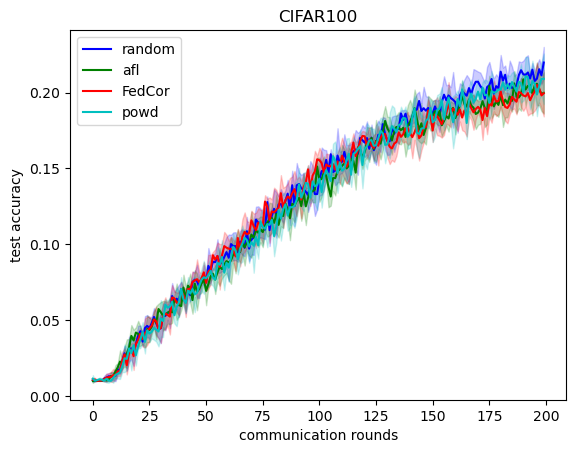

In [15]:
%matplotlib inline

rounds = 200
x = np.arange(rounds)

colors = ['b', 'g', 'r', 'c']
labels = ['random', 'afl', 'FedCor', 'powd']

for idx, item in zip(range(4), test_list):
    mean_test, std_test = item
    mean_test, std_test = mean_test[:rounds], std_test[:rounds]
    color = colors[idx]
    label = labels[idx]
    plt.plot(x, mean_test, color+'-', label=label)
    plt.fill_between(x, mean_test-std_test, mean_test+std_test, color=color, alpha=0.2)

plt.xlabel('communication rounds')
plt.ylabel('test accuracy')

plt.title('CIFAR100')
plt.legend()
plt.show()

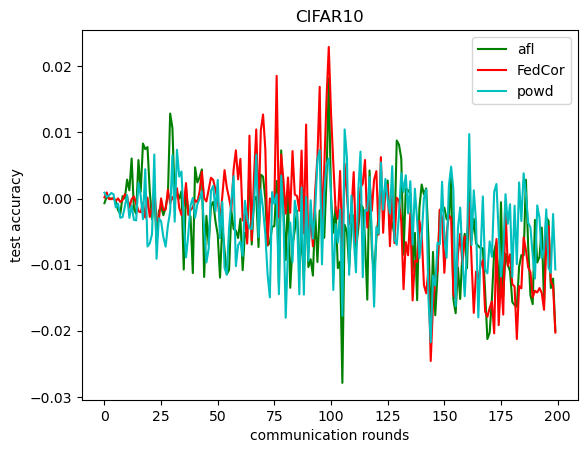

In [20]:
%matplotlib inline

rounds = 200
x = np.arange(rounds)

colors = ['b','g', 'r', 'c']
labels = ['random', 'afl', 'FedCor', 'powd']
rand_base = test_list[0][0][:rounds]

for idx, item in zip(range(1,4), test_list[1:4]):
    mean_test, std_test = item
    mean_test, std_test = mean_test[:rounds], std_test[:rounds]
    color = colors[idx]
    label = labels[idx]
    plt.plot(x, mean_test-rand_base, color+'-', label=label)
    #plt.fill_between(x, mean_test-std_test, mean_test+std_test, color=color, alpha=0.2)

plt.xlabel('communication rounds')
plt.ylabel('test accuracy')

plt.title('CIFAR10')
plt.legend()
plt.show()

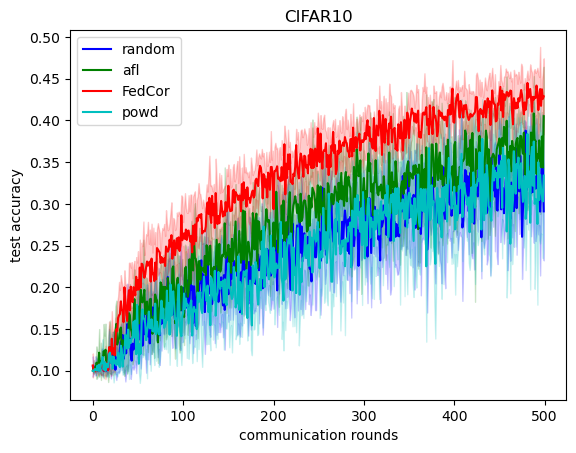

In [58]:
%matplotlib inline

x = np.arange(500)

colors = ['b', 'g', 'r', 'c']
labels = ['random', 'afl', 'FedCor', 'powd']

for idx, item in zip(range(4), test_list):
    mean_test, std_test = item
    color = colors[idx]
    label = labels[idx]
    plt.plot(x, mean_test, color+'-', label=label)
    plt.fill_between(x, mean_test-std_test, mean_test+std_test, color=color, alpha=0.2)

plt.xlabel('communication rounds')
plt.ylabel('test accuracy')

plt.title('CIFAR10')
plt.legend()
plt.show()

In [85]:
std_test[-10:]*100

array([6.05832188, 2.54745834, 9.67863544, 3.35249758, 4.80506566,
       8.24557336, 5.41602585, 4.69845336, 6.8052274 , 1.01326009])